### 17. Letter Combinations of a Phone Number

In [ ]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        phonedict = dict()
        phonedict[2], phonedict[3], phonedict[4], phonedict[5], phonedict[6] = 'abc', 'def', 'ghi', 'jkl', 'mno'
        phonedict[7], phonedict[8], phonedict[9] = 'pqrs', 'tuv', 'wxyz'

        res = []
        def rec(digits, word, c, i):
            if i > len(digits):
                return
            word += c
            if len(word) == len(digits):
                res.append(word)
                return
            for c in phonedict[int(digits[i])]:
                rec(digits, word, c, i+1)
            return
                
        rec(digits, '', '', 0)
        return [r for r in res if r != ""]

- First, I saved the strings corresponding to a digit on the phone in the dictionary `phonedict`.
- Then I used the recursive function `rec`, to accumulate every combination of letters for the given `digits`.  

### 95. Unique Binary Search Trees II

In [ ]:
class Solution:
    def getTrees(self, start, end):
        if start > end:  # the current node does not have any subtrees
            return [None]
        
        # for every root node in the range of n, we calculate the node's left and right subtrees
        res = []
        for root in range(start, end+1):
            leftTrees = self.getTrees(start, root-1)  # i.e. for root: 3  leftTrees:  Trees(1,2) -> ...
            rightTrees = self.getTrees(root+1, end)   #                   rightTrees: Trees(4,3) -> [None]

            # actually build the trees and add them to res
            for l in leftTrees:
                for r in rightTrees:
                    res.append(TreeNode(root, l, r))

        return res

    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        return self.getTrees(1, n)

- How it works is that we recursively calculate every possible left and right subtree for every `root` in the range `n`.
- The left subtrees, `leftTrees`, will be all possible trees in the range `1` to `root-1`, while the right subtrees, `rightTrees`, will be all possible trees in the range `root+1` to `n`.

### 97. Interleaving String

In [ ]:
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        
        m = dict()
        found = False
        def bt(s1, s2, s3):
            nonlocal found
            if found: 
                return True
            if not s1 and not s2 and not s3: 
                found = True
                return True
            if (s1,s2) in m:
                return m[(s1,s2)]
            
            r1,r2 = False,False
            if s3 and s1 and s1[0] == s3[0]:
                r1 = bt(s1[1:], s2, s3[1:])
            if s3 and s2 and s2[0] == s3[0]:
                r2 = bt(s1, s2[1:], s3[1:])
                
            m[(s1,s2)] = r1 or r2
            return r1 or r2
        
        return bt(s1,s2,s3)

- I solved this problem with a **Backtracking** approach combined with **Memoization**.
- How it works is that we try all possible ways of constructing `s3` from `s1` and `s2` and cut off whenever we reach a state where the first letter of `s3` does not match either of the first letters of `s1` and `s2`.
- We save the results in a dictionary `m` such that we can avoid recalculating a result that we have already calculated.

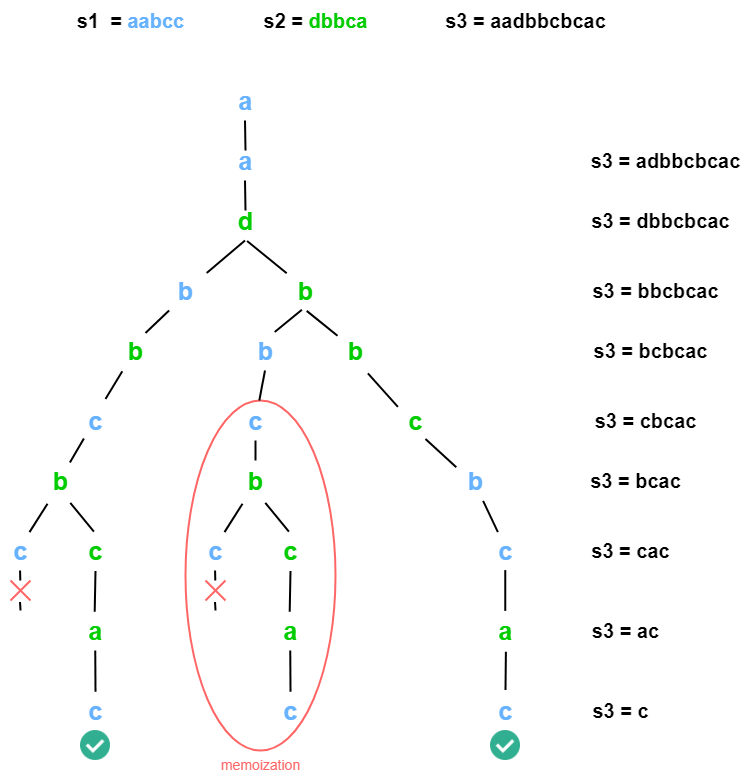

### 139. Word Break

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        wordDict = set(wordDict)
        res, seen = False, set()

        def bt(constructed, remainder, wordDict):
            # memoization happens here. we keep track of the words we have already tried so we don't end up trying them again
            if constructed not in seen: seen.add(constructed)
            else: return
            
            # we have succesfully constructed the string from wordDict
            if not remainder:
                nonlocal res 
                res = True
                return

            for word in wordDict:
                if remainder.startswith(word):
                    bt(constructed + word, remainder[len(word):], wordDict)
            return

        bt("", s, wordDict)
        return res

- We perform a **Depth-first search** to construct `s` with the given `wordList`.
- On every recursive call, we iterate over `wordList`, and start another recursive call for every `word` that matches the beginning of the `remainder` of `s`.
- Eventually we will either have no `remainder`, which means that we have successfully constructed `s`, or we don't have any words left that match the beginning of the `remainder`, at which point we cut off.

### 403. Frog Jump

In [ ]:
class Solution:
    def canCross(self, stones: List[int]) -> bool:
        end_stone = stones[-1]
        stones = set(stones)
        
        # adding the cache wrapper to ensure previous calculations are memoized and we don't have to explicitly save them in a memoization dict
        @cache
        def dfs(stone, jump):
            if stone == end_stone: return True
            if not stone in stones: return False
            
            res = False
            for j in [ jump-1, jump, jump+1 ]:
                # if j is not greater zero we stay on the same stone infinitely
                if j > 0: res |= dfs(stone+j, j)
            return res
            
        return dfs(0,0)

- I solved this problem using **Depth-first search** with **Memoization**.
- How it works is that we start on the first `stone`, and recursively try to reach the last stone, `end_stone`, by calling our `dfs` with the current `jump` in the allowed range (between plus and minus one) and adding the `jump` on top of the current `stone`.